In [1]:
from mvtrajectories import *
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
mb = pd.read_csv('mb-relative-abundances.csv')

### Real Data

#### Zero Inflated L2 Norm

In [4]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = zero_inflated_lp_norm
ids = list(mb['patientID'].unique())
for i in range(len(ids)):
    subset = mb[mb['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mb.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
random.seed(31521)
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [5]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
28
33
34
3
64
55


C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


iteration 2
42
31
45
3
51
45
iteration 3
48
40
38
4
40
47
iteration 4
48
49
36
5
35
44
iteration 5
52
46
40
6
36
37
iteration 6
47
53
46
9
31
31
iteration 7
47
50
55
12
28
25
iteration 8
49
50
53
15
26
24
iteration 9
47
47
55
19
23
26
iteration 10
43
44
58
23
21
28
iteration 11
42
35
65
27
21
27
iteration 12
42
26
72
29
21
27
iteration 13
40
25
73
30
21
28
iteration 14
39
26
68
33
20
31
iteration 15
38
26
65
36
20
32
iteration 16
38
23
65
38
20
33
iteration 17
34
22
69
39
20
33
iteration 18
34
27
68
35
20
33
iteration 19
33
30
68
31
20
35
iteration 20
30
29
73
29
20
36
iteration 21
28
29
73
29
20
38
iteration 22
30
28
73
26
21
39
iteration 23
30
29
76
22
21
39
iteration 24
30
28
76
23
21
39
iteration 25
30
28
76
23
21
39


In [13]:
zl2clusters = deepcopy(clusters)
zl2assign = deepcopy(curr_assign)

#### L2 Norm

In [15]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = lp_norm
ids = list(mb['patientID'].unique())
for i in range(len(ids)):
    subset = mb[mb['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mb.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
random.seed(31521)
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [16]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
8
23
44
2
96
44


C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


iteration 2
16
30
62
5
53
51
iteration 3
16
36
66
11
44
44
iteration 4
15
41
74
9
36
42
iteration 5
15
54
67
8
35
38
iteration 6
15
60
66
6
34
36
iteration 7
15
67
60
6
34
35
iteration 8
16
68
59
4
35
35
iteration 9
16
68
59
4
35
35
iteration 10
15
68
60
4
33
37
iteration 11
15
69
59
4
32
38
iteration 12
15
69
59
4
32
38
iteration 13
14
69
59
4
33
38
iteration 14
14
68
59
4
34
38
iteration 15
14
68
58
4
35
38
iteration 16
14
70
56
4
35
38
iteration 17
14
70
56
4
35
38


In [17]:
l2clusters = deepcopy(clusters)
l2assign = deepcopy(curr_assign)

#### Comparing

In [24]:
rand_index(zl2assign, l2assign)

0.7466717869943676

['Enterocloster', 'Lactobacillus', 'Blautia', 'Bacteroides', 'Streptococcus']


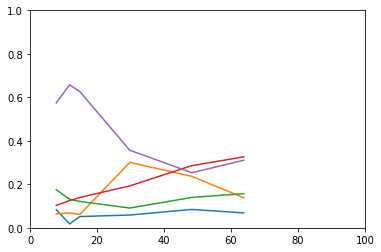

In [33]:
print(list(mb.columns[5:]))
multiline(zl2clusters[3], scalar, False)

['Enterocloster', 'Lactobacillus', 'Blautia', 'Bacteroides', 'Streptococcus']


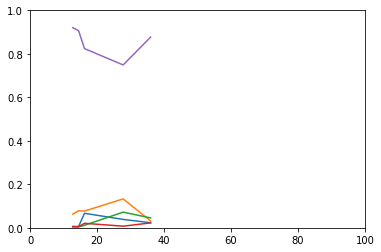

In [34]:
print(list(mb.columns[5:]))
multiline(l2clusters[3], scalar, False)

### Mild Zero Inflation

In [3]:
mba = introduce_zeros(.1, mb, range(5,10))

#### Zero Inflated L2 Norm

In [4]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = zero_inflated_lp_norm
ids = list(mba['patientID'].unique())
for i in range(len(ids)):
    subset = mba[mba['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mba.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
random.seed(31521)
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [5]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
20
33
38
4
74
48


C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


iteration 2
33
47
37
4
44
52
iteration 3
33
51
50
4
39
40
iteration 4
29
57
56
4
34
37
iteration 5
31
60
56
4
30
36
iteration 6
32
62
60
4
27
32
iteration 7
34
64
59
4
25
31
iteration 8
36
64
56
4
25
32
iteration 9
37
64
54
4
25
33
iteration 10
37
65
53
4
25
33
iteration 11
37
66
51
4
25
34
iteration 12
37
68
46
4
25
37
iteration 13
37
68
44
4
26
38
iteration 14
37
68
46
4
25
37
iteration 15
37
67
49
4
24
36
iteration 16
37
66
48
4
26
36
iteration 17
37
64
51
4
26
35
iteration 18
38
61
54
4
26
34
iteration 19
40
60
55
4
26
32
iteration 20
40
60
56
4
26
31
iteration 21
40
60
57
4
26
30
iteration 22
40
60
57
4
26
30
iteration 23
40
60
57
4
26
30


In [6]:
zl2clusters = deepcopy(clusters)
zl2assign = deepcopy(curr_assign)

#### L2 Norm

In [7]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = lp_norm
ids = list(mba['patientID'].unique())
for i in range(len(ids)):
    subset = mba[mba['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mba.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
random.seed(31521)
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [8]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
18
30
51
4
46
68
iteration 2
23
35
51
11
42
55
iteration 3
25
39
64
12
30
47
iteration 4
28
54
66
12
22
35
iteration 5
32
60
58
14
25
28
iteration 6
40
64
46
13
29
25
iteration 7
40
73
39
13
28
24
iteration 8
38
81
36
12
26
24
iteration 9
37
76
36
12
31
25
iteration 10
36
71
40
11
34
25
iteration 11
36
74
39
10
33
25
iteration 12
36
74
40
8
34
25
iteration 13
35
73
42
7
35
25
iteration 14
36
74
42
5
35
25
iteration 15
36
75
42
4
35
25
iteration 16
36
76
42
3
35
25
iteration 17
35
77
42
3
35
25
iteration 18
35
77
42
3
35
25


In [9]:
l2clusters = deepcopy(clusters)
l2assign = deepcopy(curr_assign)

#### Comparing

In [10]:
rand_index(zl2assign, l2assign)

0.746031746031746

['Enterocloster', 'Lactobacillus', 'Blautia', 'Bacteroides', 'Streptococcus']


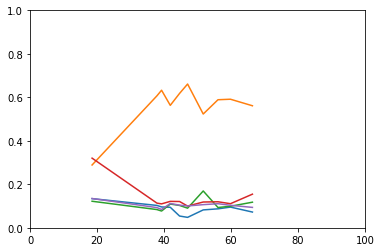

In [31]:
print(list(mb.columns[5:]))
multiline(zl2clusters[0], scalar, False)

['Enterocloster', 'Lactobacillus', 'Blautia', 'Bacteroides', 'Streptococcus']


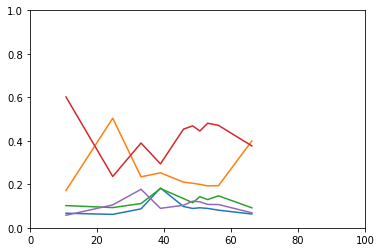

In [36]:
print(list(mb.columns[5:]))
mmultiline(l2clusters[0], scalar, False)

### Medium Zero Inflation

In [41]:
mbb = introduce_zeros(.25, mb, range(5,10))

In [42]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = zero_inflated_lp_norm
ids = list(mbb['patientID'].unique())
for i in range(len(ids)):
    subset = mbb[mbb['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mbb.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [43]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
19
38
39
14
66
41
iteration 2
39
38
53
17
39
31
iteration 3
48
26
66
16
41
20
iteration 4
46
36
61
22
32
20
iteration 5
46
40
60
26
29
16
iteration 6
41
47
49
34
26
20
iteration 7
46
47
41
33
28
22
iteration 8
48
47
39
33
23
27
iteration 9
51
49
36
32
19
30
iteration 10
47
51
36
33
22
28
iteration 11
40
54
37
35
25
26
iteration 12
37
56
34
38
28
24
iteration 13
41
52
31
40
28
25
iteration 14
48
47
31
38
30
23
iteration 15
50
41
33
40
30
23
iteration 16
46
48
31
39
30
23
iteration 17
46
51
28
39
30
23
iteration 18
46
53
26
39
30
23
iteration 19
46
56
25
38
29
23
iteration 20
45
55
25
40
29
23
iteration 21
47
56
25
39
27
23
iteration 22
44
58
25
40
28
22
iteration 23
42
59
27
39
28
22
iteration 24
41
58
29
40
27
22
iteration 25
40
60
29
40
26
22
iteration 26
41
60
29
39
26
22
iteration 27
41
60
28
39
27
22
iteration 28
42
58
28
39
28
22
iteration 29
44
57
30
37
27
22
iteration 30
43
58
29
36
28
23
iteration 31
43
58
29
36
28
23


In [44]:
zl2clusters = deepcopy(clusters)
zl2assign = deepcopy(curr_assign)

#### L2 Norm

In [83]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = lp_norm
ids = list(mbb['patientID'].unique())
for i in range(len(ids)):
    subset = mbb[mbb['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mbb.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [84]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
88
4
58
20
22
25
iteration 2
30
128
22
12
14
11
iteration 3
22
34
31
59
24
47
iteration 4
20
37
20
55
16
69
iteration 5
19
33
20
51
15
79
iteration 6
19
36
20
41
16
85
iteration 7
19
41
17
38
14
88
iteration 8
19
40
17
28
17
96
iteration 9
19
38
16
28
20
96
iteration 10
18
36
15
30
27
91
iteration 11
17
36
15
34
28
87
iteration 12
17
34
17
32
27
90
iteration 13
17
33
20
31
26
90
iteration 14
17
34
21
29
27
89
iteration 15
17
32
22
29
28
89
iteration 16
17
33
23
29
32
83
iteration 17
17
33
23
29
35
80
iteration 18
17
32
25
29
39
75
iteration 19
17
32
25
28
48
67
iteration 20
17
32
25
24
59
60
iteration 21
16
33
25
21
62
60
iteration 22
15
36
26
16
59
65
iteration 23
14
38
27
16
57
65
iteration 24
14
37
28
15
59
64
iteration 25
14
37
28
15
59
64
iteration 26
14
36
28
15
63
61
iteration 27
14
37
29
15
57
65
iteration 28
14
37
28
16
54
68
iteration 29
14
36
29
14
50
74
iteration 30
14
37
28
13
39
86
iteration 31
14
36
30
13
39
85
iteration 32
14
36
29
13
34
91
iteration 33
14
3

In [51]:
l2clusters = deepcopy(clusters)
l2assign = deepcopy(curr_assign)

#### Comparing

In [52]:
rand_index(zl2assign, l2assign)

0.7159071513910223

['Enterocloster', 'Lactobacillus', 'Blautia', 'Bacteroides', 'Streptococcus']


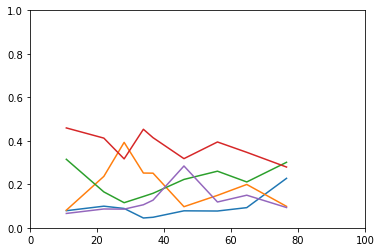

In [65]:
print(list(mb.columns[5:]))
multiline(zl2clusters[1], scalar, False)

['Enterocloster', 'Lactobacillus', 'Blautia', 'Bacteroides', 'Streptococcus']


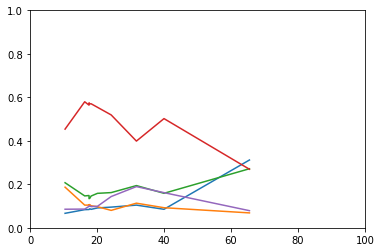

In [74]:
print(list(mb.columns[5:]))
multiline(l2clusters[4], scalar, False)

### Severe Zero Inflation

In [75]:
mbc = introduce_zeros(.5, mb, range(5,10))

In [76]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = zero_inflated_lp_norm
ids = list(mbc['patientID'].unique())
for i in range(len(ids)):
    subset = mbc[mbc['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mbc.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [77]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
39
39
58
27
34
18


C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\sethd\Anaconda3\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


iteration 2
23
45
51
39
29
28
iteration 3
21
39
53
35
27
40
iteration 4
24
39
42
35
24
51
iteration 5
29
37
31
34
22
62
iteration 6
35
45
31
34
19
51
iteration 7
36
50
29
31
20
49
iteration 8
38
54
27
40
20
36
iteration 9
41
56
26
44
20
28
iteration 10
38
61
25
41
19
31
iteration 11
31
57
27
44
19
37
iteration 12
36
51
27
46
18
37
iteration 13
37
55
26
44
18
35
iteration 14
41
52
27
42
18
35
iteration 15
40
52
25
44
18
36
iteration 16
44
53
26
41
16
35
iteration 17
44
54
28
41
23
25
iteration 18
44
54
27
41
22
27
iteration 19
45
55
28
41
19
27
iteration 20
35
63
28
43
21
25
iteration 21
36
67
23
40
21
28
iteration 22
41
70
22
38
19
25
iteration 23
38
73
21
38
20
25
iteration 24
37
72
21
38
20
27
iteration 25
35
69
21
40
22
28
iteration 26
42
65
21
37
23
27
iteration 27
40
68
22
37
21
27
iteration 28
37
66
22
41
22
27
iteration 29
41
64
19
42
22
27
iteration 30
41
60
18
46
23
27
iteration 31
45
61
17
43
24
25
iteration 32
43
62
16
44
25
25
iteration 33
44
63
15
45
23
25
iteration 34
44


In [78]:
zl2clusters = deepcopy(clusters)
zl2assign = deepcopy(curr_assign)

#### L2 Norm

In [85]:
# make a list of Trajectory class objects
trajectories = []
scalar = 0.001
nrm = lp_norm
ids = list(mbc['patientID'].unique())
for i in range(len(ids)):
    subset = mbc[mbc['patientID'] == ids[i]]
    trajectories.append(Trajectory(ids[i], subset.iloc[:,5:].values, subset.iloc[:,1].values, scalar))
    
patients = mbc.groupby(['patientID']).size()
six = list(patients[patients >= 6].index) # somewhat large initial trajectories

# initialize clusters randomly
k = 6
#init_ids = random.sample(range(len(ids)), k)
init_ids = random.sample(six, k) # initial clusters have cluster size 6
clusters = []
for i in init_ids:
    idx = ids.index(i)
    clusters.append(deepcopy(trajectories[idx]))
for i in range(k):
    clusters[i].cluster = i # name clusters

In [86]:
prev_assign = [0 for x in range(len(trajectories))]
curr_assign = [1 for x in range(len(trajectories))]
ctr = 0
while curr_assign != prev_assign:
    ctr = ctr + 1
    prev_assign = curr_assign
    # assign to clusters
    for i in range(len(ids)):
        frsp = free_space(trajectories[i].longitudinal, 
                          clusters[0].longitudinal,
                          trajectories[i].times,
                          clusters[0].times,
                          nrm)
        idx = clusters[0].cluster
        dist = frechet_dist(frsp)
        traj = backtrack(frsp)
        for j in range(1, k):
            frsp = free_space(trajectories[i].longitudinal, 
                              clusters[j].longitudinal,
                              trajectories[i].times,
                              clusters[j].times,
                              nrm)
            curr = frechet_dist(frsp)
            if curr < dist:
                dist = curr
                traj = backtrack(frsp)
                idx = clusters[j].cluster
        trajectories[i].cluster = idx
        trajectories[i].parameterization = traj
        trajectories[i].dist = dist
    
    print('iteration', ctr)
    for i in range(k):
        print(len([x.identity for x in trajectories if x.cluster == i]))
    
    # calculate cluster trajectory
    for i in range(k):
        cl = [x for x in trajectories if x.cluster == clusters[i].cluster]
        clusters[i].longitudinal, clusters[i].times = mean_trajectory(cl)
        
    curr_assign = [x.cluster for x in trajectories] 

iteration 1
116
43
3
12
27
14
iteration 2
20
19
2
11
20
143
iteration 3
13
53
0
25
30
94


IndexError: list index out of range

With severe zero inflation, we reach an IndexError because k-means wants to have a cluster with no assignments to it.